In [36]:
import numpy as np
import pandas as pd

In [37]:
data=pd.read_excel('excel12.xlsx')

In [38]:
data

,年龄,收入,学生,信誉,归类：买计算机？
0,青,高,否,良,不买
1,青,高,否,优,不买
2,中,高,否,良,买
3,老,中,否,良,买
4,老,低,是,良,买
5,老,低,是,优,不买
6,中,低,是,优,买
7,青,中,否,良,不买
8,青,低,是,良,买
9,老,中,是,良,买


In [40]:
data.rename({'归类：买计算机？':'Y'},axis=1,inplace=True)
data

,年龄,收入,学生,信誉,Y
0,青,高,否,良,不买
1,青,高,否,优,不买
2,中,高,否,良,买
3,老,中,否,良,买
4,老,低,是,良,买
5,老,低,是,优,不买
6,中,低,是,优,买
7,青,中,否,良,不买
8,青,低,是,良,买
9,老,中,是,良,买


In [41]:
# data.年龄.apply(lambda x:x.replace(['青':0))
# np.where(data.年龄=='青',0,)
list_replace=[{'年龄':{'青':0,'中':1,'老':2}},
              {'收入':{'低':0,'中':1,'高':2}},
              {'学生':{'是':1,'否':0}},
              {'信誉':{'良':0,'优':1}}]
for i in list_replace:
    data=data.replace(i)
data
# ,{'收入':{'低':0,'中':1,'高':2}},{'学生':{'是':1,'否':0}},{'学生':{'良':0,'优	':1}}

,年龄,收入,学生,信誉,Y
0,0,2,0,0,不买
1,0,2,0,1,不买
2,1,2,0,0,买
3,2,1,0,0,买
4,2,0,1,0,买
5,2,0,1,1,不买
6,1,0,1,1,买
7,0,1,0,0,不买
8,0,0,1,0,买
9,2,1,1,0,买


In [42]:
train_col= [ i for i in list(data.columns) if i !='Y'  ]
train_col
# list(data.columns)

['年龄', '收入', '学生', '信誉']

In [35]:
# train_data=pd.get_dummies(data[train_col])

In [51]:
from  sklearn.tree  import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import  roc_curve,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split  

In [44]:
train_X,test_X,train_y,test_y=train_test_split(data[train_col],data.Y,train_size=0.8,random_state=42)

In [46]:
dec_tree_model=DecisionTreeClassifier(criterion='entropy',  max_depth=2)

In [47]:
dec_tree_res=dec_tree_model.fit(train_X,train_y)

In [48]:
dec_tree_res.score(train_X,train_y)

0.8181818181818182

In [54]:
#conda install graphviz
yuce=dec_tree_res.predict(test_X)
print(classification_report(test_y,yuce))

              precision    recall  f1-score   support

          不买       0.00      0.00      0.00       1.0
           买       0.00      0.00      0.00       2.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



In [57]:
from sklearn.externals.six import StringIO
dot_data = StringIO() #解决中文乱码
#图形化树结构
dot_tree = tree.export_graphviz(dec_tree_res,out_file=dot_data, #树的内容存入dot_data对象
                                feature_names=train_col,#X特征的列名
                                class_names=['买','不买'],#去重后Y的取值，注意顺序别标反
                                filled=True, #是否有填充色
                                rounded=True #是否为圆角边
                                )

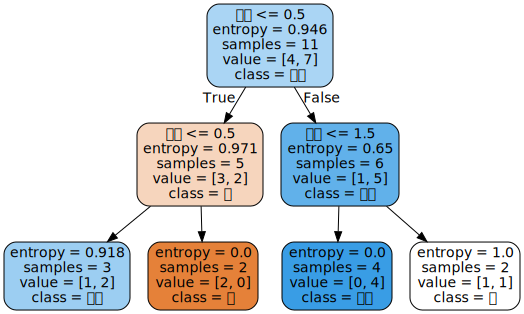

In [58]:
import graphviz
graph = graphviz.Source(dot_data.getvalue().replace("helvetica",'"Microsoft YaHei"')) #把dot_data 内容转化为图形
#replace("helvetica",'"Microsoft YaHei"') 是为解决中文乱码
#图形导出 
graph.render("d:/ttt")
graph

In [59]:
# #pip install graphviz
# import graphviz
# graph=graphviz.Source(dot_data.getvalue().replace('helvetica','"Microsoft YaHei"'))
# graph

# # 导出 titanic.dot 文件
# with open("tree.dot", 'w') as f:
#     f = tree.export_graphviz(dec_tree_res, out_file=f,feature_names=None,)
#     graph=graphviz.Source(f.getvalue().replace('helvetica','"Microsoft YaHei"'))
# graph

In [65]:
pd.concat([train_X,train_y],axis=1) 

,年龄,收入,学生,信誉,Y
12,1,2,1,0,买
5,2,0,1,1,不买
8,0,0,1,0,买
2,1,2,0,0,买
1,0,2,0,1,不买
13,2,1,0,1,不买
4,2,0,1,0,买
7,0,1,0,0,不买
10,0,1,1,1,买
3,2,1,0,0,买
